# CENSUS_INCOME_DATASET
Problem Statement:
    
    This data was extracted from the 1994 Census bureau database. The data set contains different information required to predict the Income of the individuals.
    
    PREDICTION:
        
        The prediction task is to determine whether a person makes over $50K a year or not.

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# GETTING THE DATASETS

In [2]:
df=pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# EDA

In [3]:
df.shape

(32560, 15)

In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df['Income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32560, dtype: object

# REMOVING DUPLICATES

In [8]:
df['Age'].duplicated().sum()

32487

In [9]:
df['Workclass'].duplicated().sum()

32551

In [10]:
df['Occupation'].duplicated().sum()

32545

In [11]:
df['Education'].duplicated().sum()

32544

In [12]:
df['Sex'].duplicated().sum()

32558

In [13]:
df['Income'].duplicated().sum()

32558

In [14]:
df1=df.drop_duplicates()
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [15]:
df1.duplicated().sum()

0

In [16]:
df.shape

(32560, 15)

In [17]:
df1.shape

(32536, 15)

In [18]:
df1.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [19]:
df1.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# CONVERTING OBJECT DATATYPES

In [20]:
from sklearn.preprocessing import OrdinalEncoder
ordin=OrdinalEncoder()

In [21]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=ordin.fit_transform(df1[i].values.reshape(-1,1))

In [22]:
df1.dtypes

Age                 int64
Workclass         float64
Fnlwgt              int64
Education         float64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country    float64
Income            float64
dtype: object

# CONVERTING FLOAT DATA INTO INT

In [23]:
for i in df1.columns:
    if df1[i].dtypes=='float':
        df1[i]=df1[i].astype('int')  

In [24]:
df1.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

In [25]:
df1.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# DATA VISUALIZATION

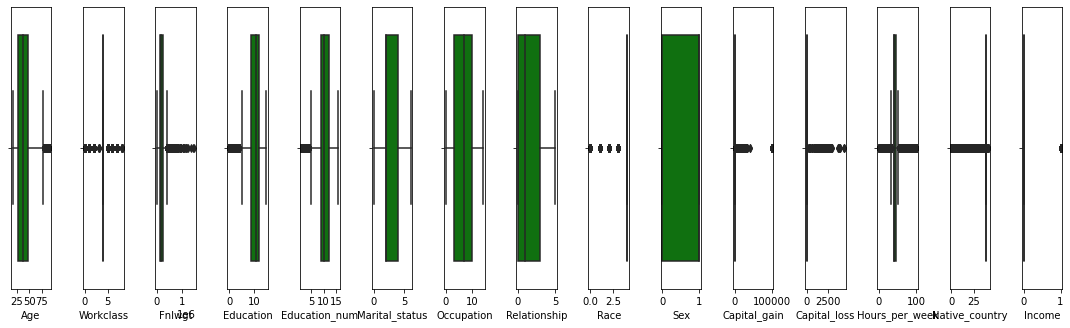

In [32]:
collist=df1.columns.values
ncol=30
nrows=20
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1) 
    sns.boxplot(df1[collist[i]],color='green')
    plt.tight_layout()


The above gives a clear picture of outliers present 

<AxesSubplot:ylabel='Count'>

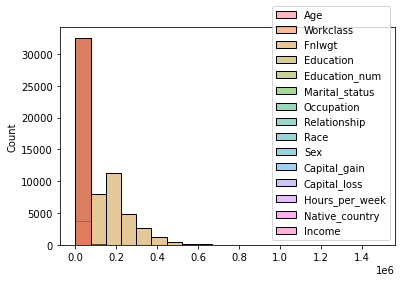

In [33]:
sns.histplot(data=df1,bins=20)

The above explains about the count of all columns

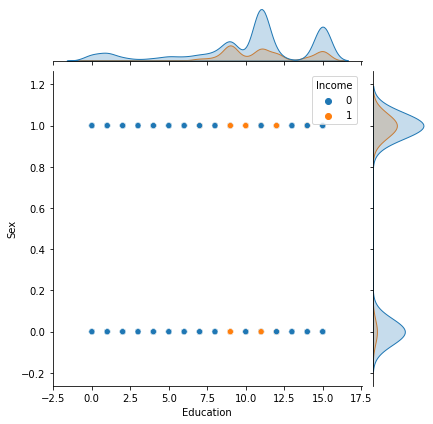

In [34]:
sns.jointplot(data=df1,x='Education',y='Sex',hue='Income')

 This compares between education,sex with income

<AxesSubplot:xlabel='Income', ylabel='Density'>

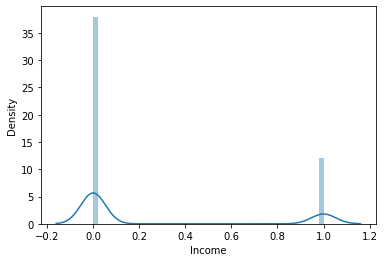

In [36]:
sns.distplot(df1['Income'])

This shows the distribution of income

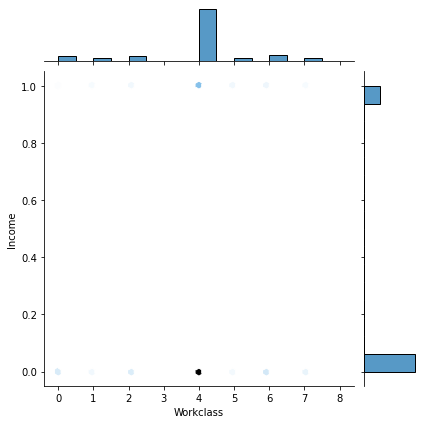

In [42]:
sns.jointplot(data=df1,x='Workclass',y='Income',kind='hex')

This shows the income of different workclass

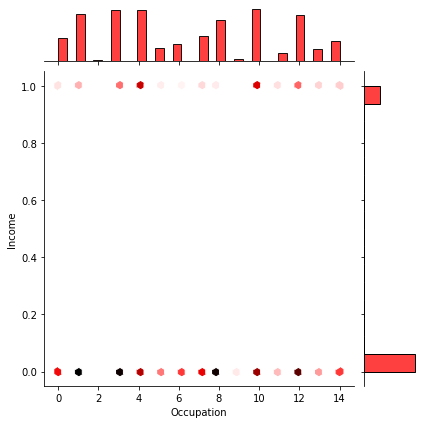

In [43]:
sns.jointplot(data=df1,x='Occupation',y='Income',kind='hex',color='red')

This compares the occupation with income

# DATA CLENSING

In [44]:
df1.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,3.868638,1.897843e+05,10.297547,10.081725,2.611384,6.573027,1.446552,3.665816,0.669228,1078.410069,87.370912,40.440343,36.721508,0.240933
std,13.638193,1.456363,1.055563e+05,3.870195,2.571622,1.506304,4.229473,1.607087,0.848858,0.470498,7388.068465,403.107737,12.347079,7.820842,0.427656
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.369932e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [45]:
df1.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003781,-0.076448,-0.010551,0.036224,-0.266142,-0.020911,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.001524,0.234039
Workclass,0.003781,1.000000,-0.016532,0.023480,0.052099,-0.064828,0.255105,-0.090421,0.049717,0.095960,0.033845,0.012255,0.139059,-0.007697,0.051706
Fnlwgt,-0.076448,-0.016532,1.000000,-0.028065,-0.043353,0.028154,0.001360,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.051866,-0.009521
Education,-0.010551,0.023480,-0.028065,1.000000,0.359105,-0.038413,-0.021249,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.063874,0.079361
Education_num,0.036224,0.052099,-0.043353,0.359105,1.000000,-0.069196,0.109804,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.050127,0.335299
Marital_status,-0.266142,-0.064828,0.028154,-0.038413,-0.069196,1.000000,-0.009778,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.023414,-0.199187
Occupation,-0.020911,0.255105,0.001360,-0.021249,0.109804,-0.009778,1.000000,-0.075600,0.006811,0.080532,0.025513,0.017977,0.080502,-0.012394,0.075398
Relationship,-0.263744,-0.090421,0.008859,-0.011060,-0.094424,0.185542,-0.075600,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.005634,-0.250955
Race,0.029116,0.049717,-0.021484,0.014307,0.031998,-0.067942,0.006811,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.137847,0.071855
Sex,0.088708,0.095960,0.027113,-0.027426,0.012181,-0.129425,0.080532,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,-0.008262,0.215984


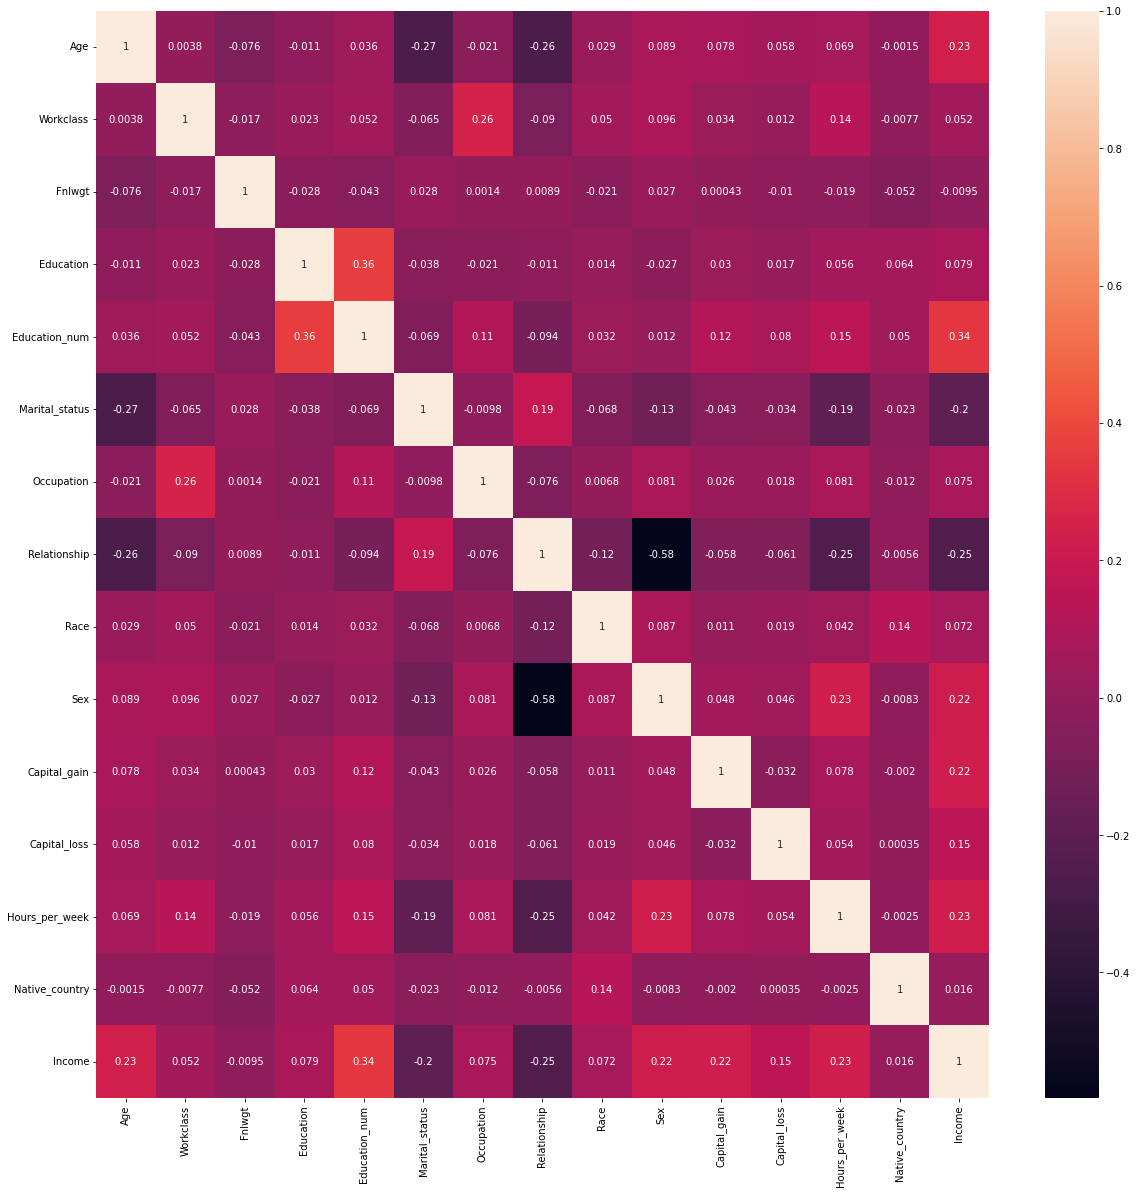

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)
plt.show()

<AxesSubplot:>

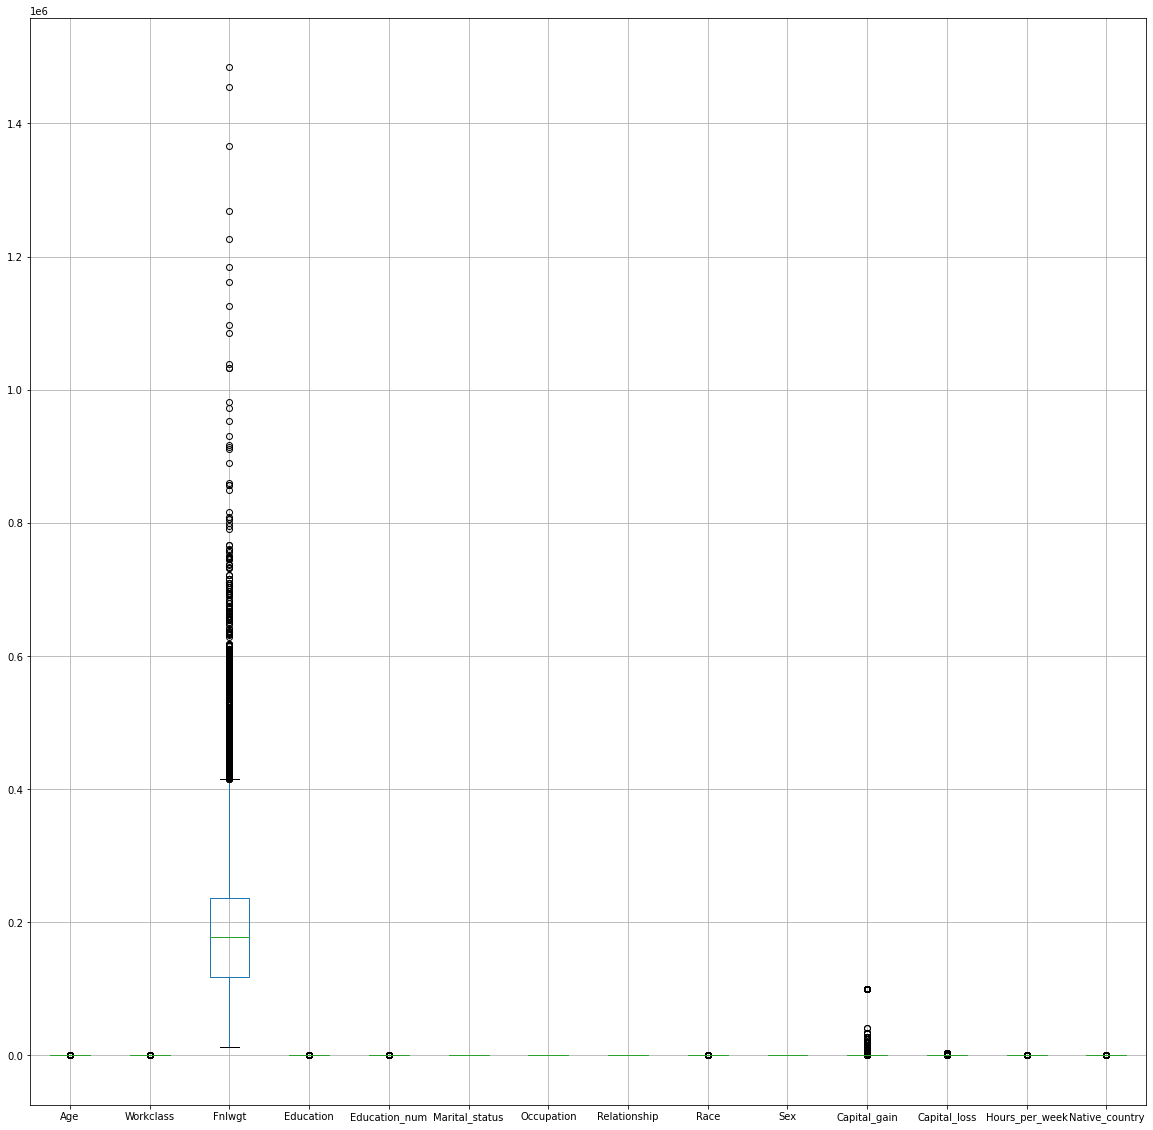

In [47]:
df1.iloc[:,0:-1].boxplot(figsize=(20,20))

In [48]:
df1.skew()

Age                0.557657
Workclass         -0.751854
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.114542
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -3.661060
Income             1.211640
dtype: float64

# REMOVING OUTLIERS

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df1))

In [50]:
dfnew=df1[(z<3).all(axis=1)]
dfnew.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0


In [51]:
dfnew.skew()

Age                0.483537
Workclass         -0.737658
Fnlwgt             0.627331
Education         -0.957459
Education_num     -0.143317
Marital_status    -0.043793
Occupation         0.130948
Relationship       0.749953
Race              -2.592371
Sex               -0.684100
Capital_gain       4.933077
Capital_loss      29.316076
Hours_per_week    -0.357277
Native_country    -5.466051
Income             1.324408
dtype: float64

In [52]:
dfnew.drop(columns=['Capital_gain','Capital_loss'],axis=1,inplace=True)

In [53]:
dfnew.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,40,39,0
4,37,4,284582,12,14,2,4,5,4,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,16,23,0


In [54]:
dfnew.shape

(27399, 13)

# SPLITTIN X AND Y

In [55]:
x=dfnew.drop('Income',axis=1)
y=dfnew['Income']

In [56]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,13,39
1,38,4,215646,11,9,0,6,1,4,1,40,39
2,53,4,234721,1,7,2,6,0,2,1,40,39
4,37,4,284582,12,14,2,4,5,4,0,40,39
5,49,4,160187,6,5,3,8,1,2,0,16,23


In [57]:
x.shape

(27399, 12)

In [58]:
y.head()

0    0
1    0
2    0
4    0
5    0
Name: Income, dtype: int32

In [59]:
y.shape

(27399,)

# BALANCING X AND Y

In [60]:
from sklearn.preprocessing import power_transform

In [61]:
newx=power_transform(x)
dfx=pd.DataFrame(data=newx,columns=x.columns)
dfx.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.923639,1.651632,-1.124723,-0.490536,1.239344,-0.382810,-0.488344,-1.108408,0.347226,0.714844,-2.214401,0.171976
1,0.128215,0.016800,0.413015,0.076547,-0.460488,-1.758752,-0.000152,0.103521,0.347226,0.714844,-0.038309,0.171976
2,1.098237,0.016800,0.593092,-2.072647,-1.262239,-0.382810,-0.000152,-1.108408,-2.883068,0.714844,-0.038309,0.171976
3,0.053254,0.016800,1.034877,0.381279,1.681371,-0.382810,-0.488344,1.548809,0.347226,-1.398906,-0.038309,0.171976
4,0.863575,0.016800,-0.156308,-1.225779,-2.023705,0.270994,0.435557,0.103521,-2.883068,-1.398906,-2.010382,-4.340932


In [62]:
dfx.shape

(27399, 12)

In [63]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27399, dtype: int32>

<AxesSubplot:xlabel='Income', ylabel='count'>

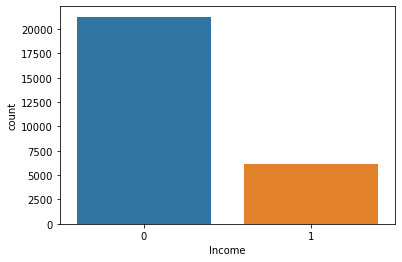

In [64]:
sns.countplot(y)

In [65]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
xnew,ynew=smt.fit_resample(dfx,y)

In [66]:
ynew.value_counts()

0    21263
1    21263
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

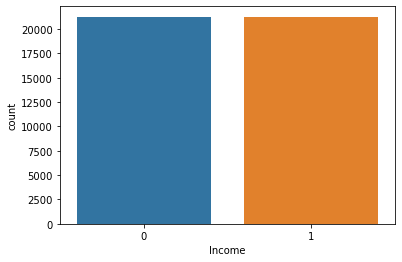

In [67]:
sns.countplot(ynew)

# TRAINING AND TESTING

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
maxAcc=0
maxRS=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(xnew,ynew,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    score=accuracy_score(y_test,predlr)
    print('Accuracy_score of LogisticRegression ' ,score, 'at random_state ' ,i)
    if score > maxAcc:
        maxAcc=score
        maxRS=i
    print('Mac acc score of lr ' ,maxAcc*100, 'at random_state ' ,maxRS) 

Accuracy_score of LogisticRegression  0.7664001881025159 at random_state  0
Mac acc score of lr  76.64001881025159 at random_state  0
Accuracy_score of LogisticRegression  0.7675758288267106 at random_state  1
Mac acc score of lr  76.75758288267106 at random_state  1
Accuracy_score of LogisticRegression  0.7660474958852574 at random_state  2
Mac acc score of lr  76.75758288267106 at random_state  1
Accuracy_score of LogisticRegression  0.7649894192334823 at random_state  3
Mac acc score of lr  76.75758288267106 at random_state  1
Accuracy_score of LogisticRegression  0.7638137785092876 at random_state  4
Mac acc score of lr  76.75758288267106 at random_state  1
Accuracy_score of LogisticRegression  0.7596990359746062 at random_state  5
Mac acc score of lr  76.75758288267106 at random_state  1
Accuracy_score of LogisticRegression  0.7645191629438044 at random_state  6
Mac acc score of lr  76.75758288267106 at random_state  1
Accuracy_score of LogisticRegression  0.7718081354338114 at ra

In [70]:
x_train,x_test,y_train,y_test=train_test_split(xnew,ynew,test_size=0.20,random_state=715)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
score=accuracy_score(predlr,y_test)
print('Accuracy_score of LogisticRegression ' ,score*100)
print(confusion_matrix(predlr,y_test))
print(classification_report(predlr,y_test))

Accuracy_score of LogisticRegression  77.6980954620268
[[3162  842]
 [1055 3447]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      4004
           1       0.80      0.77      0.78      4502

    accuracy                           0.78      8506
   macro avg       0.78      0.78      0.78      8506
weighted avg       0.78      0.78      0.78      8506



# TUNING LOGISTIC REGRESSION

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
lr=LogisticRegression()
parameters={'C':[100,10,1,0.1,0.01]}
gscvlr=GridSearchCV(estimator=lr,param_grid=parameters)
gscvlr.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01]})

In [73]:
print(gscvlr.best_params_)

{'C': 100}


In [74]:
lr1=LogisticRegression(C=0.01)
lr1.fit(x_train,y_train)
predlr1=lr1.predict(x_test)
print('Accuracy_score ' ,accuracy_score(y_test,predlr1)*100)

Accuracy_score  77.78039031272044


ACCURACY IS NOT AS EXPECTED SO GOING FOR MORE MODELS

# TESTING MORE MODELS

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
knc=KNeighborsClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

In [76]:
model=[knc,gbc,abc,etc,rfc,dtc,svc]
for i in model:
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('Accuracy_score of model ' , i ,'is = ' ,accuracy_score(y_test,predi)*100)

Accuracy_score of model  KNeighborsClassifier() is =  85.06936280272748
Accuracy_score of model  GradientBoostingClassifier() is =  85.84528568069598
Accuracy_score of model  AdaBoostClassifier() is =  84.02304255819422
Accuracy_score of model  ExtraTreesClassifier() is =  89.70138725605456
Accuracy_score of model  RandomForestClassifier() is =  89.21937455913472
Accuracy_score of model  DecisionTreeClassifier() is =  84.02304255819422
Accuracy_score of model  SVC() is =  82.30660710086998


# CROSS_VALIDATION

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
 for i in range(2,10):
        models=[knc,gbc,abc,etc,rfc,dtc]
        for j in models:
            j.fit(x_train,y_train)
            predj=j.predict(x_test)
            score=accuracy_score(y_test,predj)
            cross=cross_val_score(j,x_train,y_train,cv=i)
    
            print('Accuracy_score of model ' ,j, 'is equal == ' ,score*100)
            print('Cross validation of model ' ,j, 'is equal == ' ,cross.mean(),'at cv = ' ,i)
            print('Diff between accuracy_score and cross validation of model ' ,j, 'is equal == ' , score-(cross.mean()))

Accuracy_score of model  KNeighborsClassifier() is equal ==  85.06936280272748
Cross validation of model  KNeighborsClassifier() is equal ==  0.8257495590828925 at cv =  2
Diff between accuracy_score and cross validation of model  KNeighborsClassifier() is equal ==  0.02494406894438239
Accuracy_score of model  GradientBoostingClassifier() is equal ==  85.84528568069598
Cross validation of model  GradientBoostingClassifier() is equal ==  0.8513815402704292 at cv =  2
Diff between accuracy_score and cross validation of model  GradientBoostingClassifier() is equal ==  0.007071316536530592
Accuracy_score of model  AdaBoostClassifier() is equal ==  84.02304255819422
Cross validation of model  AdaBoostClassifier() is equal ==  0.8362727807172252 at cv =  2
Diff between accuracy_score and cross validation of model  AdaBoostClassifier() is equal ==  0.003957644864716947
Accuracy_score of model  ExtraTreesClassifier() is equal ==  89.96002821537739
Cross validation of model  ExtraTreesClassifie

# HYPERTUNING

In [79]:
from sklearn.model_selection import GridSearchCV

# ETC TUNING

In [80]:
parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
gscv_etc=GridSearchCV(estimator=etc,param_grid=parameters)
gscv_etc.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [81]:
print(gscv_etc.best_score_)
print(gscv_etc.best_params_)
print(gscv_etc.best_estimator_)

0.750764256319812
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100}
ExtraTreesClassifier(max_depth=3, max_features='log2')


# RFC TUNING

In [82]:
parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
gscv_rfc=GridSearchCV(estimator=rfc,param_grid=parameters)
gscv_rfc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [83]:
print(gscv_rfc.best_score_)
print(gscv_rfc.best_params_)
print(gscv_rfc.best_estimator_)

0.7884185773074662
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50}
RandomForestClassifier(max_depth=3, n_estimators=50)


# GBC TUNING

In [84]:
parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
gscv_gbc=GridSearchCV(estimator=gbc,param_grid=parameters)
gscv_gbc.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [85]:
print(gscv_gbc.best_score_)
print(gscv_gbc.best_params_)
print(gscv_gbc.best_estimator_)

0.8695473251028807
{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 200}
GradientBoostingClassifier(criterion='squared_error', max_features='auto',
                           n_estimators=200)


# AUC_ROC_CURVE

In [93]:
from sklearn.metrics import roc_curve,plot_roc_curve

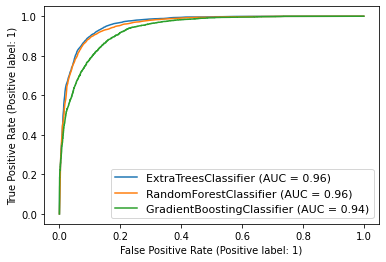

In [94]:
disp=plot_roc_curve(etc,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax = disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

# COMPARING ALL THE CLOSEST MODELS WE CONCLUDE EXTRA TREES CLASSIFIER IS THE BEST FITTING MODEL

In [95]:
fpr,tpr,thresholds=roc_curve(y_test,etc.predict(x_test))

In [96]:
fpr

array([0.        , 0.12639317, 1.        ])

In [97]:
tpr

array([0.     , 0.92609, 1.     ])

In [98]:
thresholds

array([2, 1, 0])

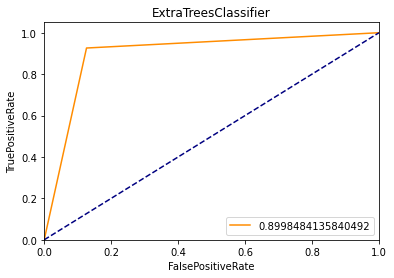

In [106]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,etc.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',label=roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ExtraTreesClassifier')
plt.legend(loc='lower right')
plt.show()

# SAVING THE BEST MODEL

In [103]:
import pickle
filename='census_income.pkl'

In [107]:
pickle.dump(etc,open(filename,'wb'))

# LOADING THE BEST MODEL 

In [109]:
pickle.load(open(filename,'rb'))

ExtraTreesClassifier()